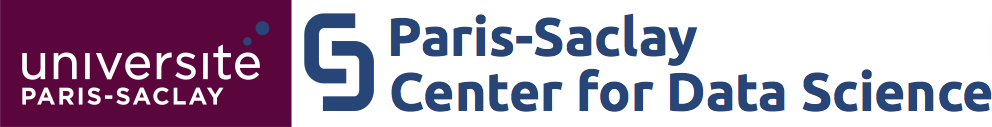

# RAMP on Electric grid imbalances. 
### Group : 
        Aamr EL KAZDADI, 
        Ramzi MISSAOUI, 
        Soufiane MOUTEI,
        Ahmed EL ALAOUI TALIBI,
        El Mahdi CHAYTI, 
        Mohammed BARRAHMA TLEMCANI

## Content

1. **[Introduction](#introduction)**
    - 1.1 - [What do we want to predict?](#what_do_we_want_to_predict)
    - 1.2 - [Prediction task](#prediction_task)
    - 1.3 - [Why is it useful ?](#why_is_it_useful)
    - 1.4 - [Long term usage of the predictor](#long_term)
    - 1.5 - [Do we have enough data ?](#do_we_have_enough_data)
    - 1.6 - [Business metrics](#business_metrics)
2. **[Exploratory data analysis](#data_exploration)**
    - 2.1 - [Loading](#loading)
    - 2.2 - [Missing values](#missing)
    - 2.3 - [Data Analysis](#analysis)
3. **[Features extractor](#feature_extractor)**
4. **[Top influencing features](#top_influencing_features)**
5. **[Regressor](#regressor)**
6. **[RAMP](#ramp)**
    - 6.1 - [The pipeline](#ramp)
    - 6.2 - [Local testing](#ramp)

<a id='introduction'></a>
## Introduction

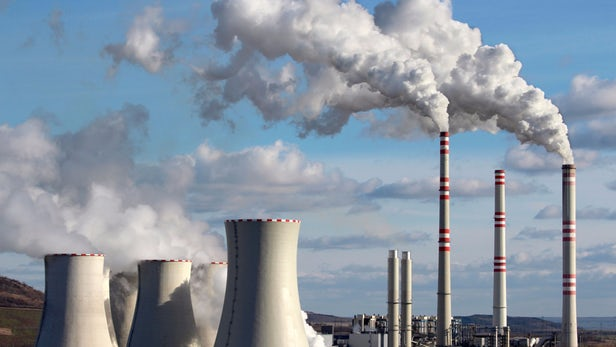

Electricity generation plants, _Credits: https://newatlas.com/carbon-dioxide-fuel-conversion-mit/52367/_

A grid electricity imbalance, usually referred to as _imbalance_, is the situation on an electricity grid where the electric input to the grid, the production, is different than the output drawn from it, the consumption. It can take two forms : either the production is superior to consumption (P > C), or the consumption is superior than the production ( C < P). The first case can result is outages, and sometimes severe damages to the grid structure and surrounding infrastructure, that can take time and be very costly to repair. The second case might lead to electricity interruptions (blackouts) that can affect households and industries. 

To deal with these situations, the grid responsible operators, the TSOs (Transmission Systems Operators), like RTE in France, TenneT in Germany, RED in Spain and Elia in Belgium have several mechanisms, that vary in cost and efficiency.
The first mechanism is to use the reserves. Reserves can be either for additional output (production) or additional inputs. For the production, the reserve types vary between, slow, that should be called early enough. These reserves, also known as the tertiary reserves are the cheapest. The other type, secondary reserves, aFRR, can be launched up to 7.5 mins in advance, but tend to be more expensive. The third type are FCR, frequence containment reserves, can be kicked in within seconds. The latter are the most expensive reserves to use. In cold winter episodes, calling the FCR reserves can cost more than 30 times the normal price, which is around 50 euros per MWh.

__The following graph shows the value of netted imbalances per month, in the different countries in the european united electricity market__

![test1.jpg](test1.jpg)

The other lever TSOs have is to increase consumption, mainly pumping storage. This means that the TSO asks a dam actor to store energy, usually for a price. Lastly, TSOs have balancing responsible parties, which they can ask to stop consumming power, against a yearly payment.

Since 1996, Europe has enforced the electricity market, in which the consumption and the production of the different actors is done through a wholesale market, where the prices are determined by the equilibrium offer/demand. This mechanism has led to improvements in the cost structure, security of supply, the environment and on innovation. (_The European Single Market in Electricity: An Economic Assessment, Cambridge Research Group)_. 

However, due to the uncertainty around supply, which is increasingly correlated to weather (solar, wind and precipitations), there is a constant need for the grid supervisors (TSO) like RTE in France, to match the supply and the demand (P = C), at any given moment. Failure to do so might result in shortages and failures on the grid, sometimes with severe consequences. 

The TSOs have several mechanisms to deal with imbalances, like pump storage (to reduce the supply) and activate reserves, to supply the grid with energy. However, both these approaches are costly if the imbalance exceeds certain thresholds, that vary across the countries. 

The grid supervisors thus need to constantly forecast the projected imabalance, as accurately as possible, to better adjust their responses. The aim of this project is to forecast the latter imbalance, using historical data provided by __ENEDIS__ ([Source](https://data.enedis.fr/explore/dataset/bilan-electrique-demi-heure/table/?sort=horodate&fbclid=IwAR1s5u6WnLueBC3JWOD-KDzoJjw__Eu2SIA8dTgZMCTFBcIQ859utjgY5cc)). Data was rearranged into a single *xlsx* file and the target column *Imbalance* was created using different columns of the data.

The dataset we provide is sliced into time slots of **30 minutes**. Here is an overview of the feature structure :
- **Month** : Month of a given year
- **Modelled losses (W)** : Loss due to the grid by the Ohm effect. These are given by a model a can deviate from actual measurements. 
- **Profile SME-SMI consumption (W)**: The expected consumption of small and medium size companies and plants. The term profiled refers to the fact that they are calculated by a profile, and adjusted for temperature. 
- **Profiled professional consumption (W)**: The profiled consumption of plants that consume more than 100 MW baseload in a year.
- **Profiled residential consumption (W)**: The profiled consumption of houses and residential facilities. 
- **Profile decentralized production (W)**:  The production of small producers. For example, if a citizen has a solar panel at home and sells electricity to the grid, this would be calculated here. 
- **Profile photovoltaic production (W)**: The profiled production of photovaltaics.
- **Smoothed realized temperature (°C)**: Smoothed actual temperature. 
- **Smoothed normal temperature (°C)**: The smoothed normal. A normal weather output refers to an average over a certain period. Usually 10 years. 
- **Total wind generation (W)**: The totally capacity generated by wind. In countries like Germany and the Netherlands (less in France), this variable is one the main drivers of production uncertainty, as the installed capacity for wind is high.
- **Pseudo radiation**: This variable is a proxy to the sun radiation. It is adjusted by the installed solar capacity. 
- **Net withdrawal to other TSOs (W)**: TSOs can exchange power from one country to another. This mechanism helps reduce the imbalances and lower the prices of electricity. 

<a id='what_do_we_want_to_predict'></a>
### What do we want to predict? 
We want to predict the **imbalance** which is the difference between the real-time demand for electricity generation and load consumption, and what is prearranged through schedules. 

As an equation, an imbalance would be expressed as: 


<center>**Imbalance = Actual Production or Usage – Scheduled Production or Usage** </center>

<a id='prediction_task'></a>
### Prediction task:
We will observe an output (the imbalance), and several expanatory variables (several weather variables, and energy consumption/production by different actors), to fit a regression model, that will output a forecast for the imbalance.

<a id='why_is_it_useful'></a>
### Why is it useful ? 
- The predictor will be used as a decision support for the grid supervisors in how they are going to act in the market. The goal is to cover the customers' needs (the demands) and to balance the supplies and the demands. It's important also to analyse the factors that influences the imblance to give the ability to the supervisors to react in case of negative imbalance.

- For the energy distribution, this would lead to the:
    - Creation of less requirements of large buffers in line to guard against contingencies.
    - Improvement of operational reliability over a wider area by enabling decision-making and response based on near-term system data.
    - Decrease in levels of reserves
    - Economic efficiency
    - Decrease in integration costs

<a id='long_term'></a>
### Long term usage of the predictor:
We can use our predictor to work out the future imbalance over year for instance, so the supervisors can evaluate their performance over this period.

<a id='do_we_have_enough_data'></a>
### Do we have enough data ?
We have training data of 4 years (2014 - 2017). It's enough to construct a predictor. However, the *Pseudo radiation* wasn't calculated before 2017 which makes imputing this feature harder as we're going to see later.

<a id='business_metrics'></a>
### Business metrics:
- *Normalized Root Mean Square Error* (Normalized RMSE): measures the size of the error in units. It is calculated as the average of the unsigned errors, as shown in the formula below:

$$
\frac{\sqrt{\frac{1}{n} \sum (\text{Actual} - \text{Predicted})^2}}{\sigma(\text{Actual})}
$$

Where $\sigma(\text{Actual})$ is the standard deviation of $\text{Actual}$


- *Mean Absolute Relative Error* (MARE): This metric measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error, as shown in the formula below:
$$
\frac{1}{n} \sum \frac{\lvert \text{Actual} - \text{Predicted} \rvert}{\lvert \text{Actual} \rvert} 
$$

    - MAPE can more practical and more confortable for some people to think in terms of percentage as it's more interpretable.
    - One the other hand, for low-volume data, where the actual value is close to zero (respectively zero) the MARE will take extreme values (respectively not defined). 
    - For our business case, our target values which correspond to the true values of the imbalance, are not close to zero which makes this metric suitable in this case.

<a id='data_exploration'></a>
## Exploratory data analysis


### Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='loading'></a>
### Load the training data


The vector _y_ contains the output, which is the historic imbalance.

In [2]:
from get_data import get_data
X, y = get_data()

In [3]:
X.head()

,Month,Modelled losses (W),Profiled MV consumption (W),Profile SME-SMI consumption (W),Profiled professional consumption (W),Profiled residential consumption (W),Profile decentralized production (W),Profile photovoltaic production (W),Other profile production (W),Smoothed realized temperature (°C),Smoothed normal temperature (°C),Total wind generation (W),Total photovoltaic production (W),Pseudo radiation,Total HTA consumption (W),Net withdrawal to other DSOs (W)
time,,,,,,,,,,,,,,,,
2014-01-11 23:00:00,1,3726030079,1301491258,3952936507,5877785648,27410623692,33158785,0,2543305,7.5,4.7,439696812,16913,NaN,10065209378,567202980
2014-01-11 23:30:00,1,3477598142,1299310114,3922672593,5780904600,25421376972,33216552,0,2543305,7.5,4.7,504782322,15600,NaN,10025301674,543846720
2014-01-12 00:00:00,1,3403524535,1275536495,3866093338,5643183750,25052558281,33246860,0,2543305,7.4,4.7,569272303,18906,NaN,9971399775,537315040
2014-01-12 00:30:00,1,3353121795,1250457986,3752038748,5539016770,24916256650,33246860,0,2543305,7.4,4.6,588763796,14277,NaN,9896277206,518258660
2014-01-12 01:00:00,1,3300406998,1225339188,3720256055,5376260830,24759853995,32949445,0,2543305,7.4,4.6,663339777,17252,NaN,9845916758,507248390


In [4]:
X.columns

Index(['Month', 'Modelled losses (W)', 'Profiled MV consumption (W)',
       'Profile SME-SMI consumption (W)',
       'Profiled professional consumption (W)',
       'Profiled residential consumption (W)',
       'Profile decentralized production (W)',
       'Profile photovoltaic production (W)', 'Other profile production (W)',
       'Smoothed realized temperature (°C)',
       'Smoothed normal temperature (°C)', 'Total wind generation (W)',
       'Total photovoltaic production (W)', 'Pseudo radiation',
       'Total HTA consumption (W)', 'Net withdrawal to other DSOs (W)'],
      dtype='object')

In [5]:
X.describe()

,Month,Modelled losses (W),Profiled MV consumption (W),Profile SME-SMI consumption (W),Profiled professional consumption (W),Profiled residential consumption (W),Profile decentralized production (W),Profile photovoltaic production (W),Other profile production (W),Smoothed realized temperature (°C),Smoothed normal temperature (°C),Total wind generation (W),Total photovoltaic production (W),Pseudo radiation,Total HTA consumption (W),Net withdrawal to other DSOs (W)
count,69602.000000,6.960200e+04,6.960200e+04,6.960200e+04,6.960200e+04,6.960200e+04,6.960200e+04,6.960200e+04,6.960200e+04,69602.000000,69602.000000,6.960200e+04,6.960200e+04,13728.000000,6.960200e+04,6.960200e+04
mean,6.565472,2.708499e+09,1.495817e+09,4.964208e+09,4.709520e+09,1.678345e+10,3.822536e+08,3.629273e+08,1.294687e+06,13.231459,13.050348,2.102772e+09,7.482127e+08,54.782051,1.285180e+10,3.712953e+08
std,3.428008,8.746860e+08,4.424901e+08,1.600585e+09,1.350340e+09,6.627009e+09,5.194522e+08,5.196497e+08,1.481717e+06,6.000738,5.830165,1.645915e+09,1.061966e+09,22.241481,2.944087e+09,1.169995e+08
min,1.000000,1.202823e+09,6.027317e+08,2.248863e+09,2.070996e+09,6.608695e+09,5.862874e+06,0.000000e+00,6.944200e+04,-1.800000,4.300000,2.118533e+07,1.292700e+04,1.000000,7.314755e+09,1.473411e+08
25%,4.000000,2.075254e+09,1.152277e+09,3.641049e+09,3.676903e+09,1.133890e+10,1.950045e+07,0.000000e+00,9.918800e+04,8.300000,7.400000,9.089264e+08,3.066700e+04,38.000000,1.025742e+10,2.808314e+08
50%,7.000000,2.472457e+09,1.481534e+09,4.661875e+09,4.502703e+09,1.531798e+10,3.803686e+07,1.748896e+07,1.766770e+05,12.900000,12.900000,1.592980e+09,2.757620e+07,54.000000,1.252995e+10,3.382070e+08
75%,10.000000,3.270319e+09,1.821721e+09,6.105326e+09,5.558746e+09,2.177177e+10,6.899723e+08,6.702518e+08,2.505903e+06,18.200000,18.500000,2.828192e+09,1.398685e+09,72.000000,1.557667e+10,4.576058e+08
max,12.000000,6.350213e+09,2.863268e+09,1.105398e+10,9.971889e+09,3.915464e+10,2.350938e+09,2.331474e+09,5.408396e+06,28.400000,23.500000,9.993884e+09,4.632248e+09,118.000000,1.950506e+10,7.485210e+08


<a id='missing'></a>
### Missing values

In [6]:
r = X.isnull().sum()
missing = pd.DataFrame(r[r > 0], columns=["Number of missing values"])
missing["Percentage of missing values"] = missing["Number of missing values"] / X.shape[0]
missing

,Number of missing values,Percentage of missing values
Pseudo radiation,55874,0.802764


Pseudo radiation is missing on $80.27 \%$ of the training data. It's better to drop this feature than trying to impute it.

<a id='analysis'></a>
### Data Analysis

In [7]:
def plot_feature(start_date, feature, plot_output=False):
    plt.figure(figsize=(15, 7))
    for i in range(0, 24*7+1, 24):
        start = pd.to_datetime(start_date) + pd.Timedelta(hours=i)
        end = start + pd.Timedelta(hours=24)
        ax = X[feature][start:end].iloc[:-1].plot(color='orange')
        
        if (plot_output):
            y[start:end].iloc[:-1].plot(color="black", label="Imbalance")
            
        ax.axvline(start, color='gray', linestyle="--")
        ax.axvline(end, color='gray', linestyle="--")
    plt.legend([feature, "Imbalance"])
    plt.title(feature);

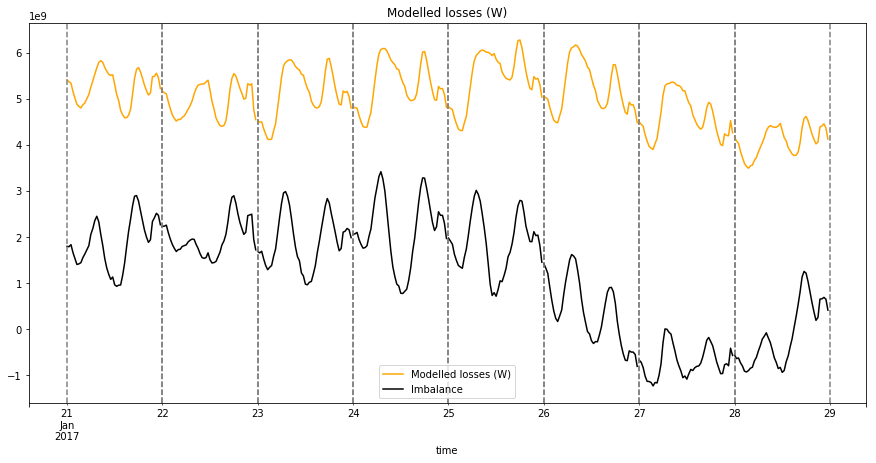

In [8]:
plot_feature("2017-01-21 00:00:00", "Modelled losses (W)", plot_output=True)

We can see that the Modelled loss variable and the imbalance time series have the same seasonality period, so the **Modelled loss** is likely to be a significant feature for the regressor model.

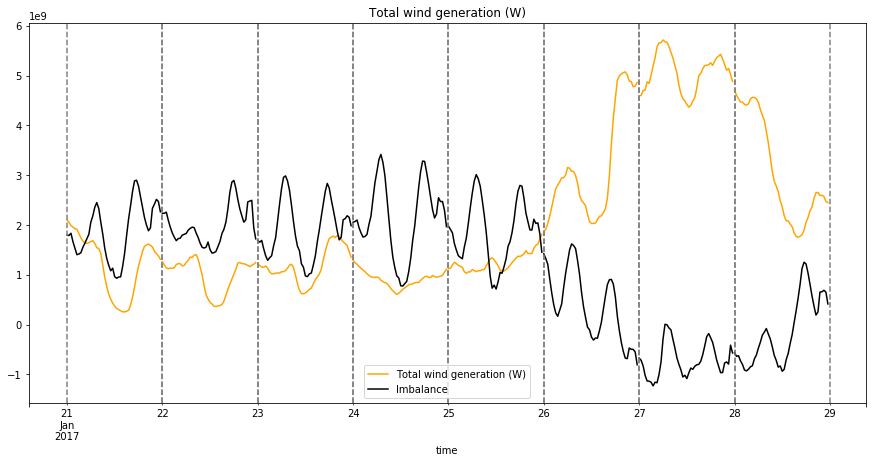

In [9]:
plot_feature("2017-01-21 00:00:00", "Total wind generation (W)", plot_output=True)

This feature is also really important. Since a big amount of wind power implies an excess of energy that needs to be repressed, the imbalance decreases when the total wind generation increases.

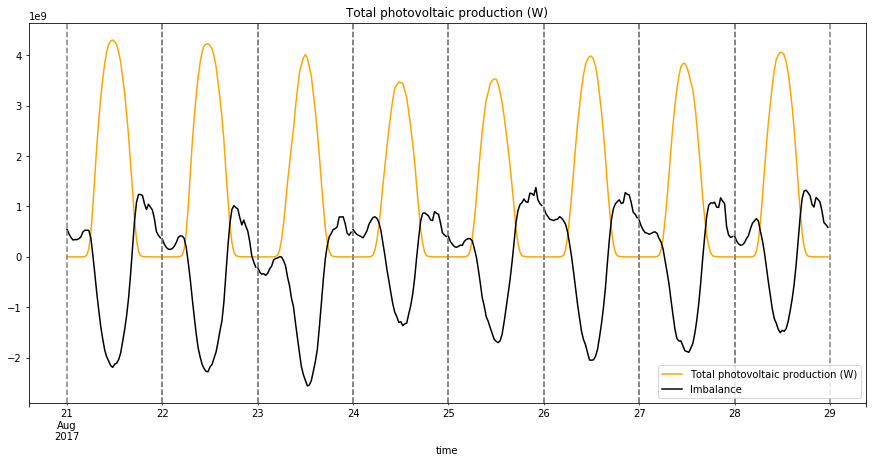

In [10]:
plot_feature("2017-08-21 00:00:00", "Total photovoltaic production (W)", plot_output=True)

We can see that we have the same remark for photovoltaic power.

<a id='feature_extractor'></a>
## Features extractor

We're going to build these features:
- **Season**: We're going to map each month $x$ to its associated season using the formula: $\text{int}(\frac{x \ \text{mod} \ 12 + 3}{3})$ given that: *Winter = 1*, *Spring = 2*, *Summer = 3*, *Fall = 4*. After that, we're going to apply a dummy encoding to it.
- **Weekend**: We're going to extract the weekday from the index then map Saturday/Sunday to 1 and the other days to 0.
- **Year**: Extracted from the index.
- Dummy encoding features of **Month**.
- The standard deviation over *24h* of **Total wind generation (W)**.
- The mean over *24h* of **Total photovoltaic production (W)** and **Total wind generation (W)**.

In [11]:
%%file submissions/starting_kit/feature_extractor.py

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
import pandas as pd
from scipy.special import boxcox1p

class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        
        season_dico = {1:"Winter", 2:"Spring", 3:"Summer", 4:"Fall"}
        X_df_new["Season"] = X_df_new.Month.apply(lambda x: season_dico[(x%12 + 3)//3])

        X_df_new["Weekend"] = X_df_new.index.weekday
        X_df_new["Weekend"] = X_df_new["Weekend"].apply(lambda t: 1 if t >= 5 else 0)
        
        X_df_new["Year"] = X_df_new.index.year
        
        X_df_new = pd.get_dummies(X_df_new, columns=["Season", "Month"], drop_first=True)
        
        X_df_new = compute_rolling_std(X_df_new, 'Total wind generation (W)', '24h')

        X_df_new = compute_rolling_mean(X_df_new, 'Total photovoltaic production (W)', '24h')
        X_df_new = compute_rolling_mean(X_df_new, 'Total wind generation (W)', '24h')
        
        X_df_new = X_df_new.drop(["Pseudo radiation"], axis=1)
        
        return X_df_new
    

def compute_rolling_std(data, feature, time_window, center=False):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (time_window) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling mean from
    time_indow : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = '_'.join([feature, time_window, 'std'])
    data[name] = data[feature].rolling(time_window, center=center).std()
    data[name] = data[name].ffill().bfill()
    return data


def compute_rolling_mean(data, feature, time_window, center=False):
    """
    For a given dataframe, compute the mean over
    a defined period of time (time_window) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling mean from
    time_indow : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = '_'.join([feature, time_window, 'mean'])
    data[name] = data[feature].rolling(time_window, center=center).mean()
    data[name] = data[name].ffill().bfill()
    return data


Overwriting submissions/starting_kit/feature_extractor.py


<a id='top_influencing_features'></a>
## Top influencing features:

We're going to see the top influencing features over the imbalance using Random Forest:

In [12]:
from sklearn.ensemble import RandomForestRegressor
from submissions.starting_kit.feature_extractor import FeatureExtractor

def evaluate(X, y):
    feature_names = list(X.columns)
    feature_importances = pd.DataFrame({'feature': feature_names})
    
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X, y)

    feature_importances["importance"] = model.feature_importances_
    
    return feature_importances

def plot_feature_importances(df, n=30):
    # Plot the n most important features
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending=False).reset_index(drop=True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:(n - 1), :].plot.barh(
        x='feature', y='importance_normalized', edgecolor='k', 
        figsize=(15, 8), legend=False, linewidth=2
    )
    plt.xlabel('Normalized Importance')
    plt.ylabel('')
    plt.title(f'{n} Most Important Features')
    plt.gca().invert_yaxis()

In [13]:
feature_importances = evaluate(FeatureExtractor().fit_transform(X, y), y)
feature_importances = feature_importances.sort_values("importance", axis=0)

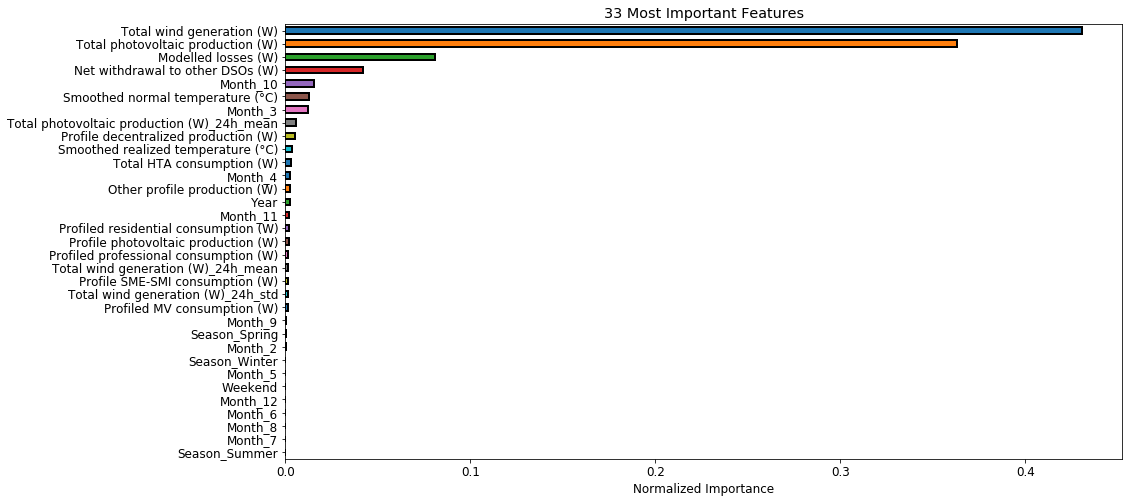

In [14]:
plot_feature_importances(feature_importances, feature_importances.shape[0])

Random forest's ranking is typically aggressive in the sense that there is a sharp drop-off of scores after the best two features. Besides, we can see that the most four important features are: **Total wind generation (W)** - **Total photovoltaic production (W)** - **Modelled losses (W)** - **Net withdrawal to other DSOs (W)**.

<a id='regressor'></a>
## Regressor:

In [15]:
%%file submissions/starting_kit/regressor.py

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

class Regressor(BaseEstimator):
    def __init__(self):
        self.model = lgb.LGBMRegressor()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

Overwriting submissions/starting_kit/regressor.py


<a id='ramp'></a>
## RAMP:

### The pipeline
For submitting at the RAMP site, we have two classes, saved in two different files:
- The class **FeatureExtractor**, which will be used to extract features for regression from the dataset and produce a numpy array of size (number of samples $\times$ number of features).
- The  class **Regressor** to predict the target (the imbalance)

### Local testing (before submission)
It is important that we test the submission files. The test runs on the files in *submissions/starting_kit*.
First <code>pip install ramp-workflow</code>. Make sure that the python files *regressor.py* and *feature_extractor.py* are in the *submissions/starting_kit* folder, and the data *train.csv* and *test.csv* are in data. Then run
<code>ramp_test_submission</code>
If it runs and print training and test errors on each fold, then you can submit the code.

In [16]:
!ramp_test_submission

Testing Electric grid imbalances
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
	score  normalized_rmse   mare
	train            0.101  0.782
	valid            0.108  1.259
	test             0.254  1.167
CV fold 1
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
	score  normalized_rmse   mare
	train            0.101  0.932
	valid            0.108  0.656
	test             0.244  1.040
CV fold 2
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
	score  normalized_rmse   mare
	train            0.102  0.909
	valid            0.107  0.668
	test             0.247  1.076
CV fold 3
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
	score  normalized_rmse   mare
	train            0.102  0.986
	valid            0.107  0.866
	test             0.247  1.112
CV fold 4
[